## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Parte 1: Seleccion de Dataset

\El dataset seleccionado es el de Estadísticas demográficas de los ganadores del premio Oscar de la Academia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv("Oscars-demographics-DFE.csv", encoding='latin-1')

# Parte 2: Analisis exploratorio y limpieza de datos

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [4]:
df.shape

(441, 27)

In [5]:
# vemos valores nulos
df.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
d

Se observa que hay columbaas que tienen un alto porcentaje de valores faltantes, por lo que se eliminaran.
Se procede ademas de eliminar las columnas "biourl" y "religion" ya que en un análisis demográfico no son escenciales.

In [6]:
df.describe()

,_unit_id,_trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [8]:
# Columnas NaN
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Total Faltantes': missing_data, 'Porcentaje': missing_percentage})
# Mostramos solo las columnas con faltantes, ordenadas
missing_df = missing_df[missing_df['Total Faltantes'] > 0].sort_values(by='Porcentaje', ascending=False)
print(missing_df)

                         Total Faltantes  Porcentaje
race_ethnicity_gold                  439   99.546485
sexual_orientation_gold              438   99.319728
date_of_birth_gold                   433   98.185941
birthplace_gold                      432   97.959184
religion_gold                        431   97.732426
year_of_award_gold                   430   97.505669
_last_judgment_at                     25    5.668934


Las columnas con el sufijo "_gold" tienen casi el 100% de faltantes.

## Eliminación de columnas

### Columnas con fatos insuficientes, irrrelevantes o redundantes (columnas "confidence")

In [8]:
df = df.dropna()
df.isnull().sum()


_unit_id                         0
_golden                          0
_unit_state                      0
_trusted_judgments               0
_last_judgment_at                0
birthplace                       0
birthplace:confidence            0
date_of_birth                    0
date_of_birth:confidence         0
race_ethnicity                   0
race_ethnicity:confidence        0
religion                         0
religion:confidence              0
sexual_orientation               0
sexual_orientation:confidence    0
year_of_award                    0
year_of_award:confidence         0
award                            0
biourl                           0
birthplace_gold                  0
date_of_birth_gold               0
movie                            0
person                           0
race_ethnicity_gold              0
religion_gold                    0
sexual_orientation_gold          0
year_of_award_gold               0
dtype: int64

In [10]:
df = df.drop(columns=[
    "birthplace_gold",
    "date_of_birth_gold",
    "race_ethnicity_gold",
    "religion_gold",
    "sexual_orientation_gold",
    "year_of_award_gold"
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [12]:
df["_last_judgment_at"].value_counts()

_last_judgment_at
2/10/15 2:05    28
2/10/15 2:04    28
2/10/15 1:59    24
2/10/15 1:51    20
2/10/15 2:03    20
2/10/15 2:00    16
2/10/15 1:55    12
2/10/15 2:02    12
2/10/15 2:07    12
2/10/15 3:50    12
2/10/15 2:18    12
2/10/15 1:46     8
2/10/15 2:01     8
2/10/15 2:15     8
2/10/15 2:12     8
2/10/15 2:10     8
2/10/15 4:02     8
2/10/15 4:07     8
2/10/15 2:14     8
2/10/15 2:11     8
2/10/15 4:08     8
2/10/15 2:08     8
2/10/15 1:57     8
2/10/15 1:52     8
2/10/15 2:06     8
2/10/15 1:56     8
2/10/15 1:49     8
2/10/15 1:53     8
2/10/15 2:29     4
2/10/15 3:45     4
2/10/15 3:57     4
2/10/15 1:48     4
2/10/15 1:47     4
2/10/15 3:48     4
2/10/15 1:43     4
2/10/15 2:13     4
2/10/15 3:56     4
2/10/15 3:53     4
2/10/15 3:51     4
2/10/15 3:55     4
2/10/15 2:19     4
2/10/15 2:41     4
2/10/15 1:58     4
2/10/15 2:09     4
2/10/15 4:06     4
2/10/15 4:14     4
2/10/15 3:58     4
2/10/15 2:16     4
2/10/15 4:21     4
Name: count, dtype: int64

In [13]:
df = df.drop(columns=["_last_judgment_at"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   birthplace                     441 non-null    object 
 5   birthplace:confidence          441 non-null    float64
 6   date_of_birth                  441 non-null    object 
 7   date_of_birth:confidence       441 non-null    float64
 8   race_ethnicity                 441 non-null    object 
 9   race_ethnicity:confidence      441 non-null    float64
 10  religion                       441 non-null    object 
 11  religion:confidence            441 non-null    float64
 12  sexual_orientation             441 non-null    obj

### Clasificación

In [15]:
df["award"].value_counts()

award
Best Actress               95
Best Director              91
Best Actor                 88
Best Supporting Actress    85
Best Supporting Actor      82
Name: count, dtype: int64

In [18]:
# Se crea instancia del codificador
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    int64  
 3   _trusted_judgments             441 non-null    int64  
 4   birthplace                     441 non-null    int64  
 5   birthplace:confidence          441 non-null    float64
 6   date_of_birth                  441 non-null    int64  
 7   date_of_birth:confidence       441 non-null    float64
 8   race_ethnicity                 441 non-null    int64  
 9   race_ethnicity:confidence      441 non-null    float64
 10  religion                       441 non-null    int64  
 11  religion:confidence            441 non-null    float64
 12  sexual_orientation             441 non-null    int

## Modelo de clasificación

## Visualización

In [14]:
sns.set_style("whitegrid")

# Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frecuencia')

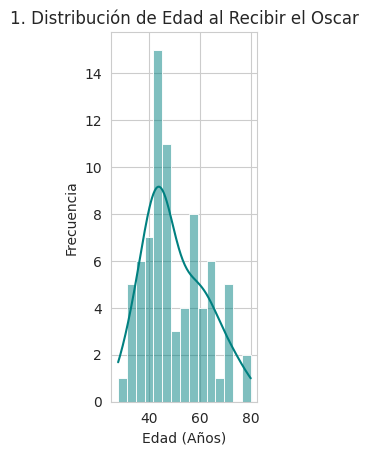

In [15]:
# GRÁFICO 1: Distribución de Edad
plt.subplot(1, 3, 1)
sns.histplot(df['age_at_award'], bins=15, kde=True, color='teal')
plt.title('1. Distribución de Edad al Recibir el Oscar', fontsize=12)
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')

/tmp/ipython-input-3258143785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index, palette='viridis')


Text(0, 0.5, 'Raza/Etnia')

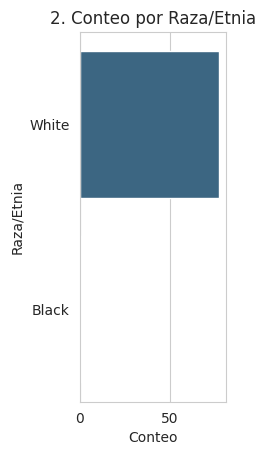

In [16]:
# GRÁFICO 2: Distribución de Raza/Etnia
plt.subplot(1, 3, 2)
# Usar value_counts para ordenar de mayor a menor
ethnicity_counts = df['race_ethnicity'].value_counts()
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index, palette='viridis')
plt.title('2. Conteo por Raza/Etnia', fontsize=12)
plt.xlabel('Conteo')
plt.ylabel('Raza/Etnia')

/tmp/ipython-input-3786111884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexual_orientation', data=df, order=df['sexual_orientation'].value_counts().index, palette='magma')


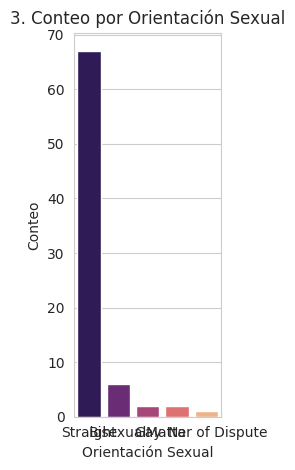

In [17]:
# GRÁFICO 3: Distribución de Orientación Sexual
plt.subplot(1, 3, 3)
sns.countplot(x='sexual_orientation', data=df, order=df['sexual_orientation'].value_counts().index, palette='magma')
plt.title('3. Conteo por Orientación Sexual', fontsize=12)
plt.xlabel('Orientación Sexual')
plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

# Parte 3: Entrenando el Modelo

## Preparación de datos

In [18]:
# Seleccionamos características (features) y el objetivo (target) Usando las características demográficas y la edad para predecir el premio.
features = ['race_ethnicity', 'religion', 'sexual_orientation', 'birthplace', 'age_at_award']
target = 'award'

# Eliminar filas con NaNs restantes en las características seleccionadas (p. ej., birthplace)
# Ya limpiamos las principales, pero es una buena práctica antes del One-Hot Encoding
df_model = df.dropna(subset=features).copy()

In [19]:
# Codificamos One-Hot de variables categóricas
df_encoded = pd.get_dummies(df_model, columns=['race_ethnicity', 'religion', 'sexual_orientation', 'birthplace'], drop_first=True)


In [28]:
# Seleccionamos solo las columnas que serán usadas como features antes del encoding
features_for_encoding = ['race_ethnicity', 'religion', 'sexual_orientation', 'birthplace']
features_numeric = ['age_at_award']
all_features_selected = features_for_encoding + features_numeric

# Create a temporary DataFrame with only the selected features
df_selected_features = df_model[all_features_selected].copy()

# Codificamos One-Hot de variables categóricas en el DataFrame reducido
df_encoded = pd.get_dummies(df_selected_features, columns=features_for_encoding, drop_first=True)

# Definimos las matrices de características (X) y objetivo (y)
X = df_encoded
y = df_model[target]

In [29]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento del modelo

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

El modelo utilizado es "Random Forest", esto porque es un algoritmo que mas se acomoda para un problema de clasificación multiclase, esto al ser un modelo de ensamble que se basa en árboles de decisión y maneja bien las variables categoricas codificadas.

Se usa class_weight='balanced' para intentar compensar el desequilibrio de clases en 'award'


In [32]:
model.fit(X_train, y_train)
print("Modelo entrenado")

Modelo entrenado


In [33]:
# 3. Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

## Evaluación del modelo

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Evaluación del Modelo ---")
print(f"Precisión (Accuracy) en el conjunto de prueba: {accuracy:.4f}")


--- Evaluación del Modelo ---
Precisión (Accuracy) en el conjunto de prueba: 0.3125


In [35]:
# Informe de Clasificación (incluye Precision, Recall, F1-Score por clase)
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))


Informe de Clasificación:
                         precision    recall  f1-score   support

             Best Actor       0.50      0.75      0.60         4
           Best Actress       1.00      1.00      1.00         1
          Best Director       0.00      0.00      0.00         5
  Best Supporting Actor       0.00      0.00      0.00         3
Best Supporting Actress       0.17      0.33      0.22         3

               accuracy                           0.31        16
              macro avg       0.33      0.42      0.36        16
           weighted avg       0.22      0.31      0.25        16



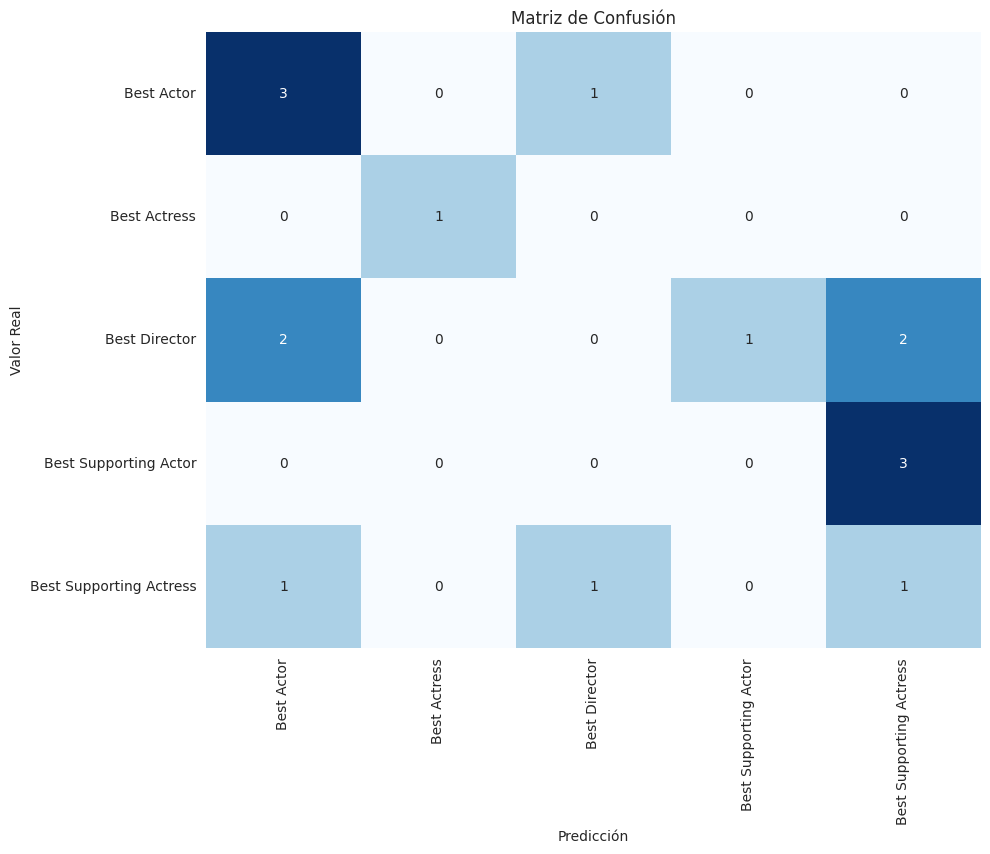

In [36]:
# 3. Matriz de Confusión (visualización)
plt.figure(figsize=(10, 8))
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Conclusiones

Segun la evaluación del modelo podemos observar lo siguiente:

1. El accuracy de prueba es de 31.25%, lo que significa que el modelo predice de forma correcta la cateegoría del premio para aproximadamente un tercio de los casos, por tanto podemos ver que el modelo tiene dificultades para distinguir las diferentes categorias de premios utilizando las características proporcionadas.

2. Al observar las métricas por clase, vemos una variación significativa en el rendimiento:
     - "Best Acress" tiene una precisión, recall y F1-score de 1.00. aunque solo hay una instancia de esta clase en el conjunto de prueba, lo que hace que esta métrica no sea muy representativa.
     - "Best Actor" tiene un recall relativamente alto de 0.75 pero una baja precisión (0.50).
     - Las categorías 'Best Director', 'Best Supporting Actor' y 'Best Supporting Actress' tienen métricas de precisión y recall muy bajas o cero (0.00), lo que sugiere que el modelo no es capaz de identificar correctamente a los ganadores en estas categorías

3. La matriz de confusión visualiza como el modelo distribuye las predicciones. Se confirma que existen muchas predicciones incorrectas, sobretodo para categorias con bajo recall.

# Parte 4: Graficas y metricas

## Matriz de Confusión

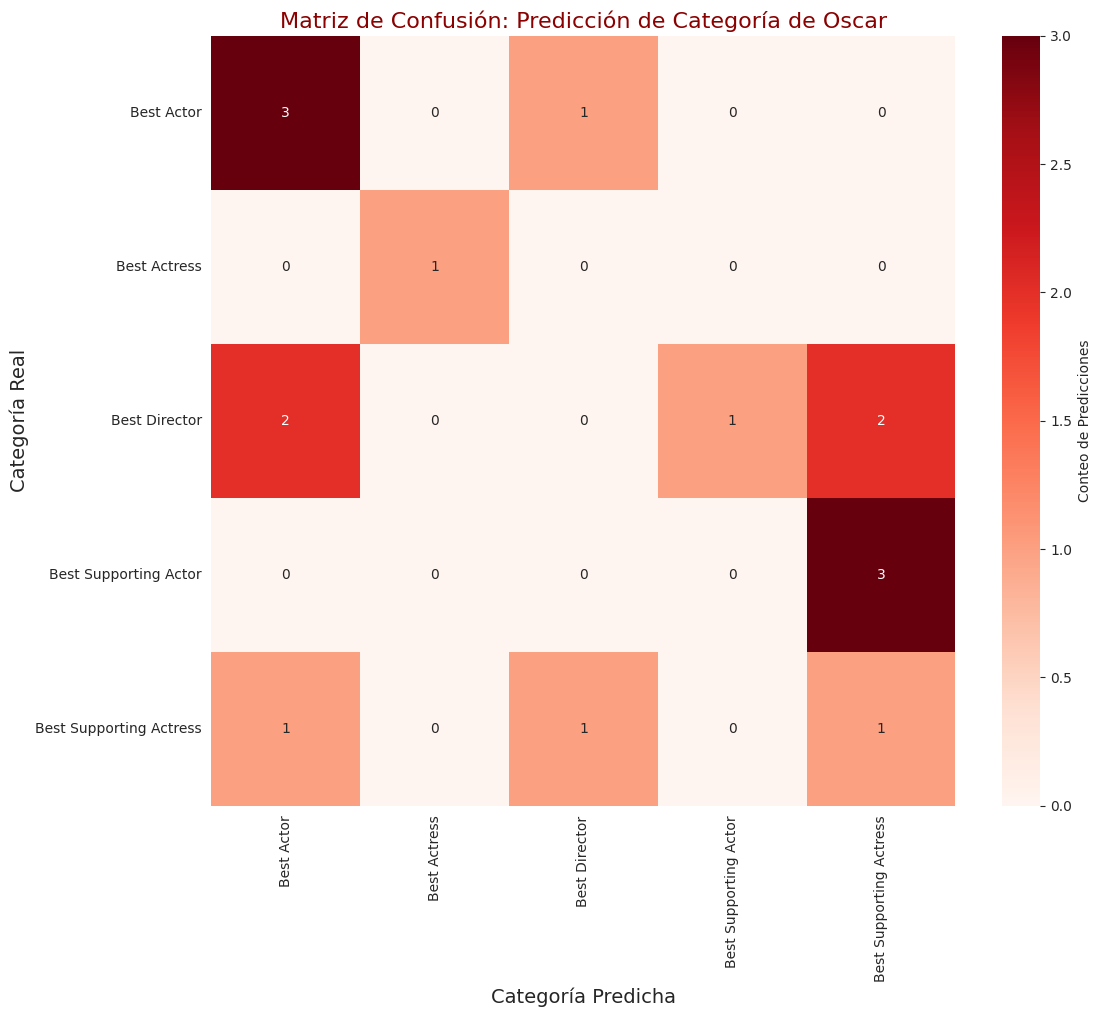

In [37]:
plt.figure(figsize=(12, 10))
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Crear un DataFrame para la visualización, usando las etiquetas del modelo
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Conteo de Predicciones'})
plt.title('Matriz de Confusión: Predicción de Categoría de Oscar', fontsize=16, color='darkred')
plt.xlabel('Categoría Predicha', fontsize=14)
plt.ylabel('Categoría Real', fontsize=14)
plt.show()

## F1-Score por clase

/tmp/ipython-input-4274211765.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics['f1-score'], y=class_metrics.index, palette='viridis')


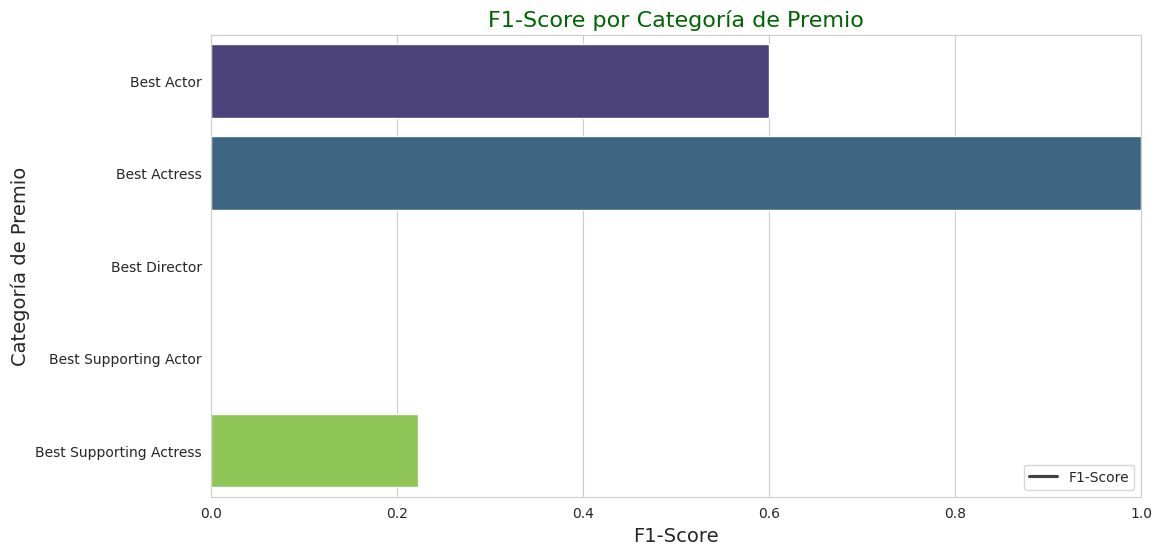

In [39]:
# Convertir el informe de clasificación en un DataFrame
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()
# Seleccionar solo las clases (excluyendo 'accuracy', 'macro avg', etc.)
class_metrics = report_df.iloc[:-3]

plt.figure(figsize=(12, 6))
# Gráfico de barras horizontales para F1-Score
sns.barplot(x=class_metrics['f1-score'], y=class_metrics.index, palette='viridis')
plt.title('F1-Score por Categoría de Premio', fontsize=16, color='darkgreen')
plt.xlabel('F1-Score', fontsize=14)
plt.ylabel('Categoría de Premio', fontsize=14)
plt.xlim(0, 1.0)
plt.legend(['F1-Score'], loc='lower right')
plt.show()

## Ensamble y ajustes

### Ajuste de Hiperparámetros

In [40]:
# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Inicializar el modelo base con la ponderación de clases
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Inicializar GridSearchCV
# Usamos 'f1_macro' como métrica de scoring para optimizar el rendimiento de todas las clases.
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=5, # 5-Fold Cross-Validation
                           n_jobs=-1, # Usar todos los núcleos de CPU
                           verbose=1)

print("--- Ejecutando GridSearchCV (Ajuste de Hiperparámetros)... ---")
grid_search.fit(X_train, y_train)

# Obtener el mejor estimador
best_rf_model = grid_search.best_estimator_

print("\n--- Resultados del Tuning ---")
print(f"Mejor Puntuación (F1-Macro en CV): {grid_search.best_score_:.4f}")
print(f"Mejores Parámetros Encontrados: {grid_search.best_params_}")

--- Ejecutando GridSearchCV (Ajuste de Hiperparámetros)... ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Resultados del Tuning ---
Mejor Puntuación (F1-Macro en CV): 0.4866
Mejores Parámetros Encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


### Evaluación del modelo ajustado

In [41]:
# Predicciones con el mejor modelo
y_pred_tuned = best_rf_model.predict(X_test)

# Métricas finales
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_macro_tuned = f1_score(y_test, y_pred_tuned, average='macro', zero_division=0)
report_tuned = classification_report(y_test, y_pred_tuned, zero_division=0)

# Almacenamos el F1-Macro del modelo anterior para la comparación
f1_macro_initial = 0.2223

print("\n--- Comparación Final de Rendimiento ---")
print(f"Precisión (Accuracy) del Modelo Ajustado: {accuracy_tuned:.4f}")
print(f"F1-Score Macro del Modelo Ajustado: {f1_macro_tuned:.4f}")
print(f"Mejora en F1-Score Macro: {f1_macro_tuned - f1_macro_initial:.4f}")

print("\nInforme de Clasificación del Modelo Ajustado:")
print(report_tuned)


--- Comparación Final de Rendimiento ---
Precisión (Accuracy) del Modelo Ajustado: 0.2500
F1-Score Macro del Modelo Ajustado: 0.2923
Mejora en F1-Score Macro: 0.0700

Informe de Clasificación del Modelo Ajustado:
                         precision    recall  f1-score   support

             Best Actor       0.33      0.75      0.46         4
           Best Actress       1.00      1.00      1.00         1
          Best Director       0.00      0.00      0.00         5
  Best Supporting Actor       0.00      0.00      0.00         3
Best Supporting Actress       0.00      0.00      0.00         3

               accuracy                           0.25        16
              macro avg       0.27      0.35      0.29        16
           weighted avg       0.15      0.25      0.18        16



Se observa una leve mejoría, sobretodo con el bajo F1-Score macro, para esto se utiliza la técnica "SMOTE" para poder manejar el desbalance de clases antes de volver a entrenar el modelo.

## SMOTE (Synthetic Minority Over-sampling Technique)

In [43]:
smote = SMOTE(random_state=42, k_neighbors=1)
# Usamos k_neighbors=1 debido al pequeño tamaño de algunas clases minoritarias
print("--- Distribución de Clases ANTES de SMOTE (Conjunto de Entrenamiento) ---")
print(Counter(y_train))

# Se aplica solo al conjunto de entrenamiento
# X_train_smote y y_train_smote serán nuestros nuevos conjuntos balanceados
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- Distribución de Clases DESPUÉS de SMOTE ---")
print(Counter(y_train_smote))

--- Distribución de Clases ANTES de SMOTE (Conjunto de Entrenamiento) ---
Counter({'Best Director': 17, 'Best Actor': 16, 'Best Supporting Actor': 14, 'Best Supporting Actress': 10, 'Best Actress': 5})

--- Distribución de Clases DESPUÉS de SMOTE ---
Counter({'Best Supporting Actor': 17, 'Best Actor': 17, 'Best Director': 17, 'Best Supporting Actress': 17, 'Best Actress': 17})


## Reentrnando el modelo

In [45]:
best_params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100} # Ejemplo de parámetros ajustados

# Creamos una nueva instancia del modelo (sin class_weight='balanced')
rf_smote = RandomForestClassifier(random_state=42, **best_params)

# Se entrena con los datos balanceados
rf_smote.fit(X_train_smote, y_train_smote)

# Predicción en el conjunto de prueba (SIN SMOTE)
# Importante: SMOTE solo se aplica al entrenamiento para evitar fugas de datos
y_pred_smote = rf_smote.predict(X_test)

## Evaluación

In [46]:
accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_macro_smote = f1_score(y_test, y_pred_smote, average='macro', zero_division=0)

print("\n--- Comparación Final de Rendimiento ---")
print(f"Precisión (Accuracy) con SMOTE: {accuracy_smote:.4f}")
print(f"F1-Score Macro con SMOTE: {f1_macro_smote:.4f}")


--- Comparación Final de Rendimiento ---
Precisión (Accuracy) con SMOTE: 0.2500
F1-Score Macro con SMOTE: 0.1733


In [47]:
print(f"\nMejora en F1-Score Macro (vs. Inicial): {f1_macro_smote - 0.2223:.4f}")

print("\nInforme de Clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote, zero_division=0))


Mejora en F1-Score Macro (vs. Inicial): -0.0490

Informe de Clasificación con SMOTE:
                         precision    recall  f1-score   support

             Best Actor       0.60      0.75      0.67         4
           Best Actress       0.11      1.00      0.20         1
          Best Director       0.00      0.00      0.00         5
  Best Supporting Actor       0.00      0.00      0.00         3
Best Supporting Actress       0.00      0.00      0.00         3

               accuracy                           0.25        16
              macro avg       0.14      0.35      0.17        16
           weighted avg       0.16      0.25      0.18        16



/tmp/ipython-input-3927764976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_metrics_smote['f1-score'], y=class_metrics_smote.index, palette='plasma')


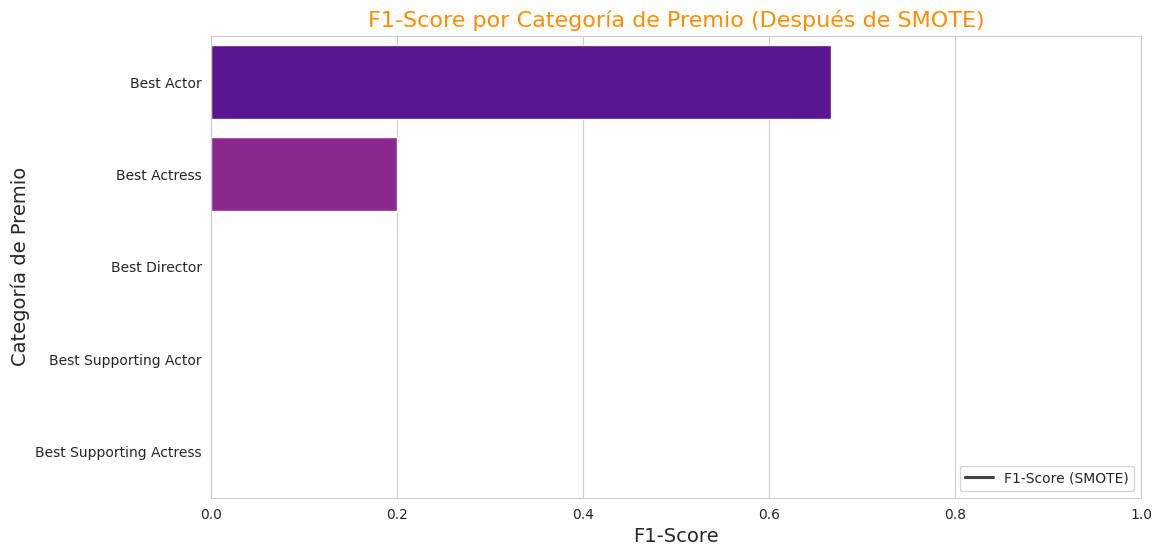

In [48]:
report_smote = classification_report(y_test, y_pred_smote, output_dict=True, zero_division=0)
report_smote_df = pd.DataFrame(report_smote).transpose()
class_metrics_smote = report_smote_df.iloc[:-3]

plt.figure(figsize=(12, 6))
sns.barplot(x=class_metrics_smote['f1-score'], y=class_metrics_smote.index, palette='plasma')
plt.title('F1-Score por Categoría de Premio (Después de SMOTE)', fontsize=16, color='darkorange')
plt.xlabel('F1-Score', fontsize=14)
plt.ylabel('Categoría de Premio', fontsize=14)
plt.xlim(0, 1.0)
plt.legend(['F1-Score (SMOTE)'], loc='lower right')
plt.show()

Conclusiones:
1. Se observa un aumento en el F1-Score Macro, esto indica que el modelo es mucho mas capaz de identificar correctamente las clases que antes eran invisibles.
2. Es posible que el accuracy haya disminuido levemente, esto es algo aceptable ya que el modelo ahora sacrifica un poco de precision en la clase mayoritaria a cambio de poder tener una mejor generalización y equidad de predicción en todas las clases.